# Introduction to numerical algorithms
## Practice class 2 Part 1 - A Stronger Start to Matplotlib

As a scientist you will always work with or produce some kind of data. To efficiently and appealingly visualize it is part of your job description. Think not only about your homework assignments or lab reports, but future articles or presentations you will make!

And let's admit, there are nothing worse in the case of ppt-s than a lot of texts, with boring figures if any.

In python there are several packages, with different backends, engines, if you wish to do plotting. Some of the most popular 🚀 ones in python are:
- `matplotlib`
- `seaborn`
- `pandas` (this one limited but perfect for data science)
- `plotly`
- `jscatter` (retro xmgr style in refreshing object oriented cloths)
- `ggplot`
- many more...

Today we will visit and understand what a plot in python is as a ```python object```, how to interact with it, how to customize it and how to make it look heart-meltingly good.

First, a figure is an `object` in python, and it has the following anatomy (source [matplotlib.org](https://matplotlib.org))

![](https://matplotlib.org/_images/anatomy.png)

Don't be intimidated, let's create our own figures, step-by-step. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

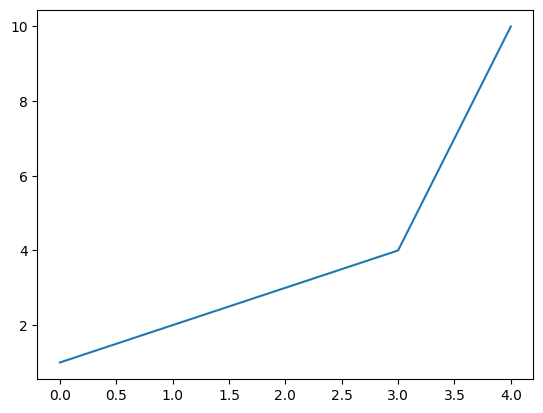

In [6]:
# Plot a simple line
plt.plot([1,2,3,4,10])

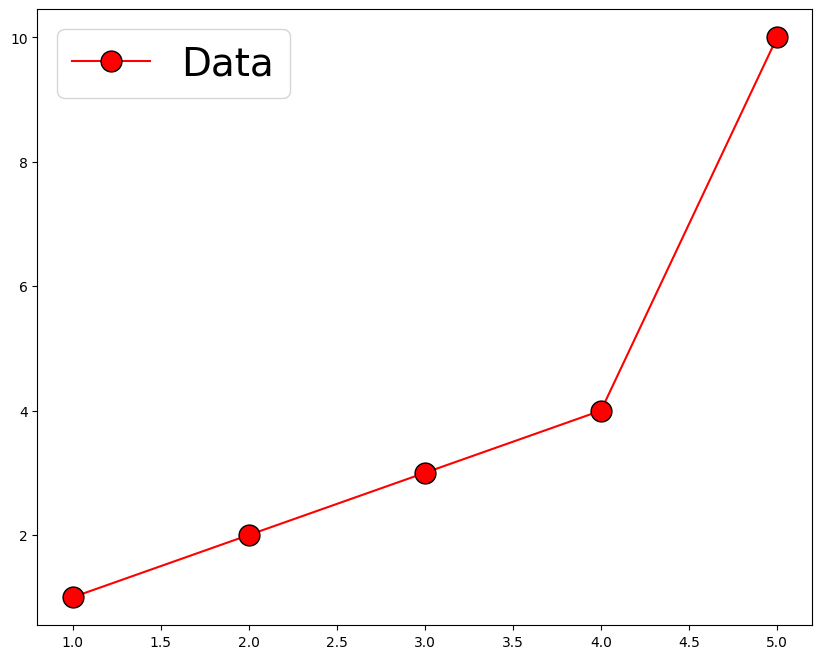

In [ ]:
# Make it nicer
# Create a figure object
plt.figure(figsize=(10,8), dpi = 100)
plt.plot(x1, y1, color = 'red' , linestyle = '-', 
         marker = 'o', mec = 'k', ms = 15, label = 'Data')
# Legends
plt.legend(fontsize = 28, loc = 'best')
# Saving
# plt.save('myfirstfig.png', dpi = 150)
plt.show()

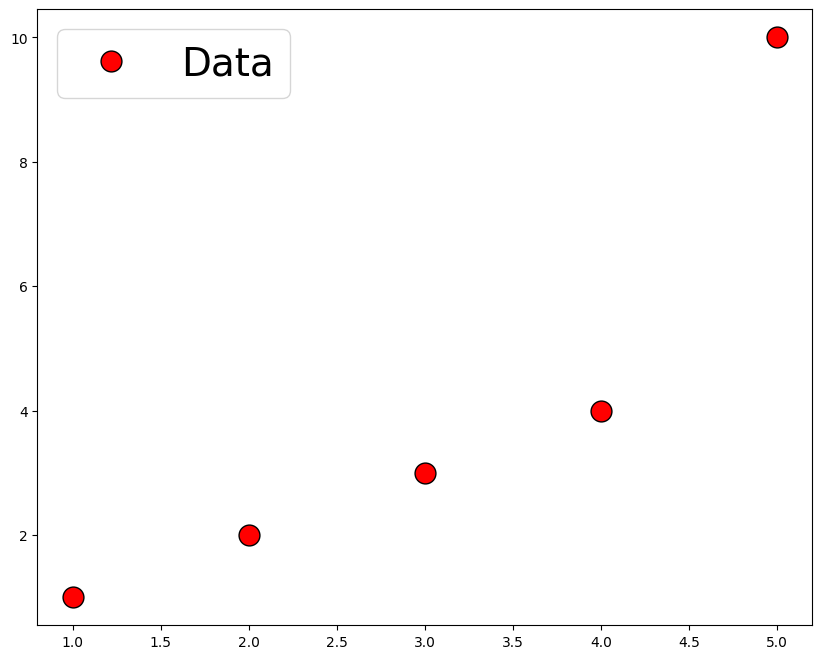

In [15]:
# Make it scatter plot
# Create a figure object
plt.figure(figsize=(10,8), dpi = 100)
plt.plot([1,2,3,4,5], [1,2,3,4,10], color = 'red' , linestyle = 'none', 
         marker = 'o', mec = 'k', ms = 15, label = 'Data')
# plt.scatter() is similar, but for large number of points it is slow. The Syntax
# is mostly the same.
# Legends
plt.legend(fontsize = 28, loc = 'best')
# Saving
# plt.save('myfirstfig.png', dpi = 150)
plt.show()

And you can combine plots on one figure, i.e. plot multiple lines and or scatters etc. You just only have to do them line by line before the `plt.show()` command, which basically closes the canvas.
# Task 1
1. Plot multiple datasets sets now. you can use the arrays I give you down, or create your own.
2. One of the lines have to be scatter plot with lines as well, the second is line only, the third is scatter only. The first set has to be red, with black marker edges, the second should be orange, the third should be magenta.
3. Give labels to the data. Don't forget to call `plt.legend()` to make them visible.
4. Look up in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) how to move the legends to an arbitrary place. Move the legend below the figure, centered, outside the canvas.

In [31]:
# Data
x1 = np.arange(5)
y1 = np.arange(5)

x2 = np.arange(5)
y2 = np.arange(5) + np.random.uniform(-5, 5, 5)

x3 = np.arange(5)
y3 = np.arange(5) ** 2

# Subfigures 📈

Next we will learn 📚, how to create subfigures!

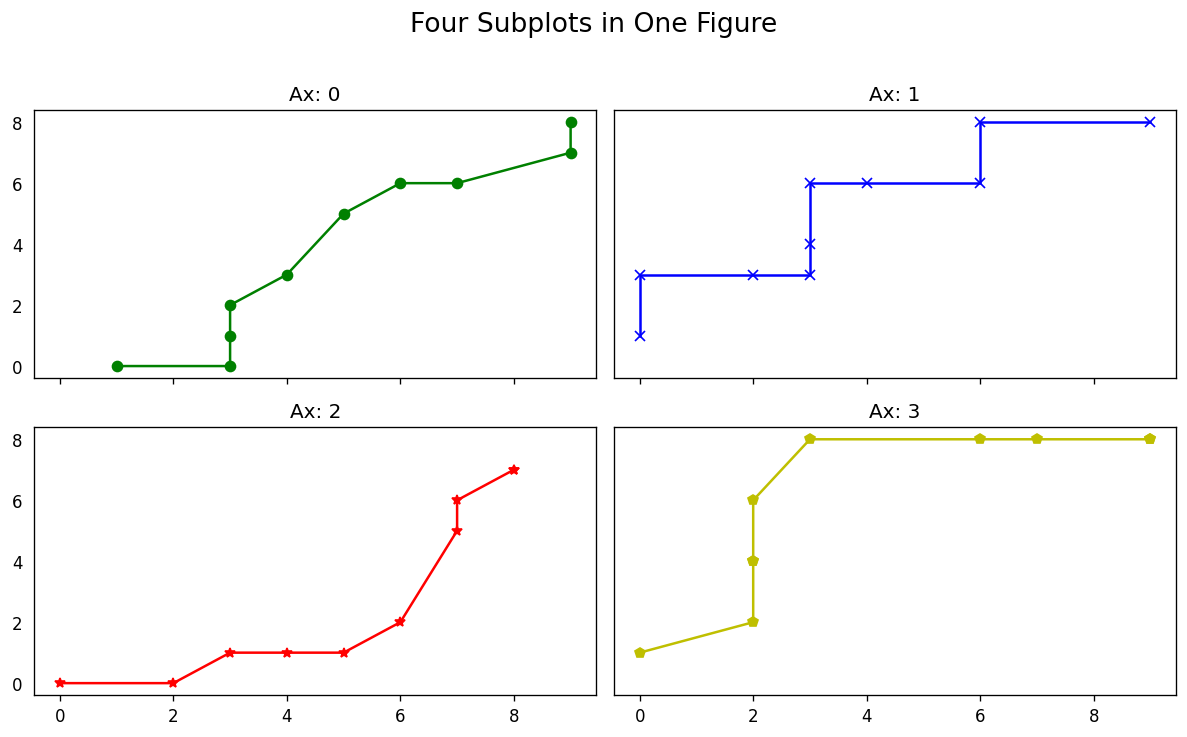

In [32]:
# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(np.random.randint(0,10,10)), sorted(np.random.randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

# Manipulating ticks and tick labels

Ticks and labels can be manipulated, starting from their font style and size to their orientation. 

Minor and major ticks can be turned on and off, their labels can be customized, by giving a list of array, with the new names, that matches the length of the ticks.

More info about ticks can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)

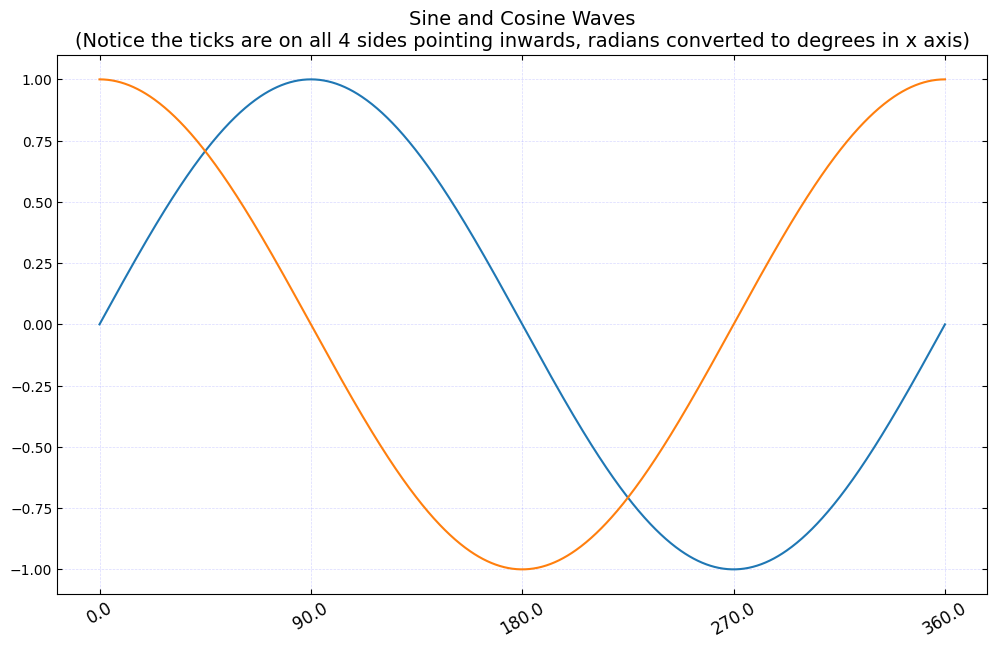

In [33]:
from matplotlib.ticker import FuncFormatter

def rad_to_degrees(x, pos):
    'converts radians to degrees'
    return round(x * 57.2985, 2)

plt.figure(figsize=(12,7), dpi=100)
X = np.linspace(0,2*np.pi,1000)
plt.plot(X,np.sin(X))
plt.plot(X,np.cos(X))

# 1. Adjust x axis Ticks
plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)', fontsize=14)
plt.show()

# Task 2

Write a function with `my_poly_plotter(n,x)` that plots the polynomials $p_k(x)=x^k$ for $k=1,\ldots,n$. 
Make sure your plot has axis labels and a title and the curves are labeled. The curve labels should be $k=\text{degree of polynomial}$ for each line.

Make a plot for $k = 5$!

# Bonus Task

Create a program, that plots the [Sierpisnki triangle](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle) and/or the [Barnsley Fern](https://en.wikipedia.org/wiki/Barnsley_fern). 

The plot should have no axes, the color and the number of the iterations should be the only arguments:

```python
def sierpinski(color, nr_iter):
    # your code
    pass

sierpinski('red', 1000)
```

# Advanced scatter plot

Another difference between `plt.plot()` and `plt.scatter()` tht the former does not provide options to change the color and size of point dynamically (based on another array). But `plt.scatter()` allows you to do that.

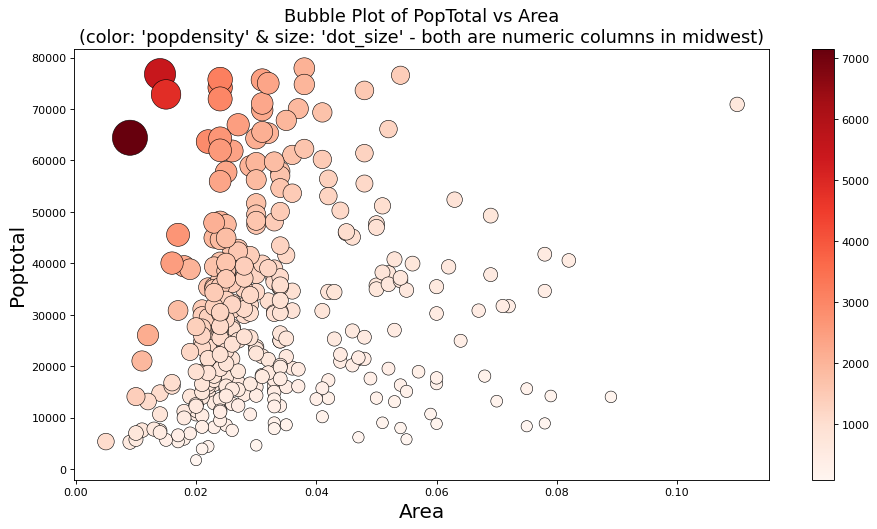

In [34]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show() 

# Other plot types

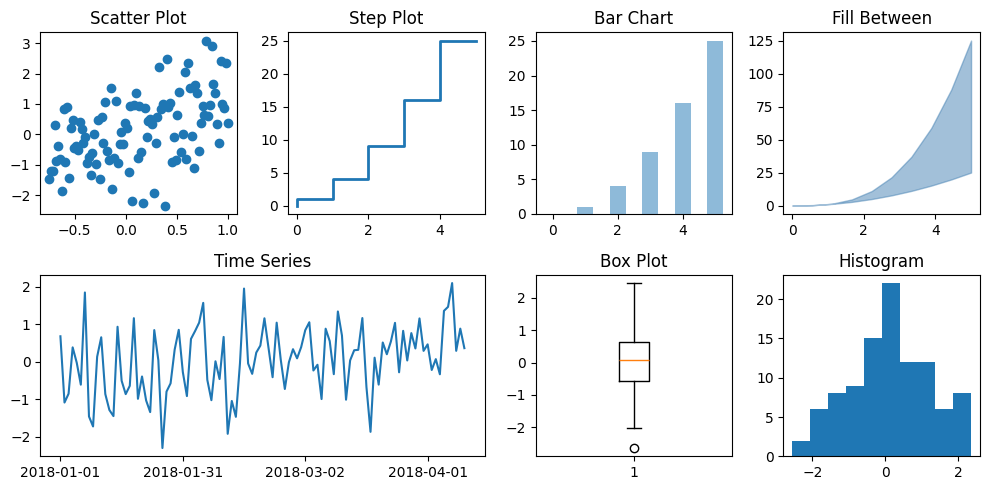

In [38]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5), dpi = 100)
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()

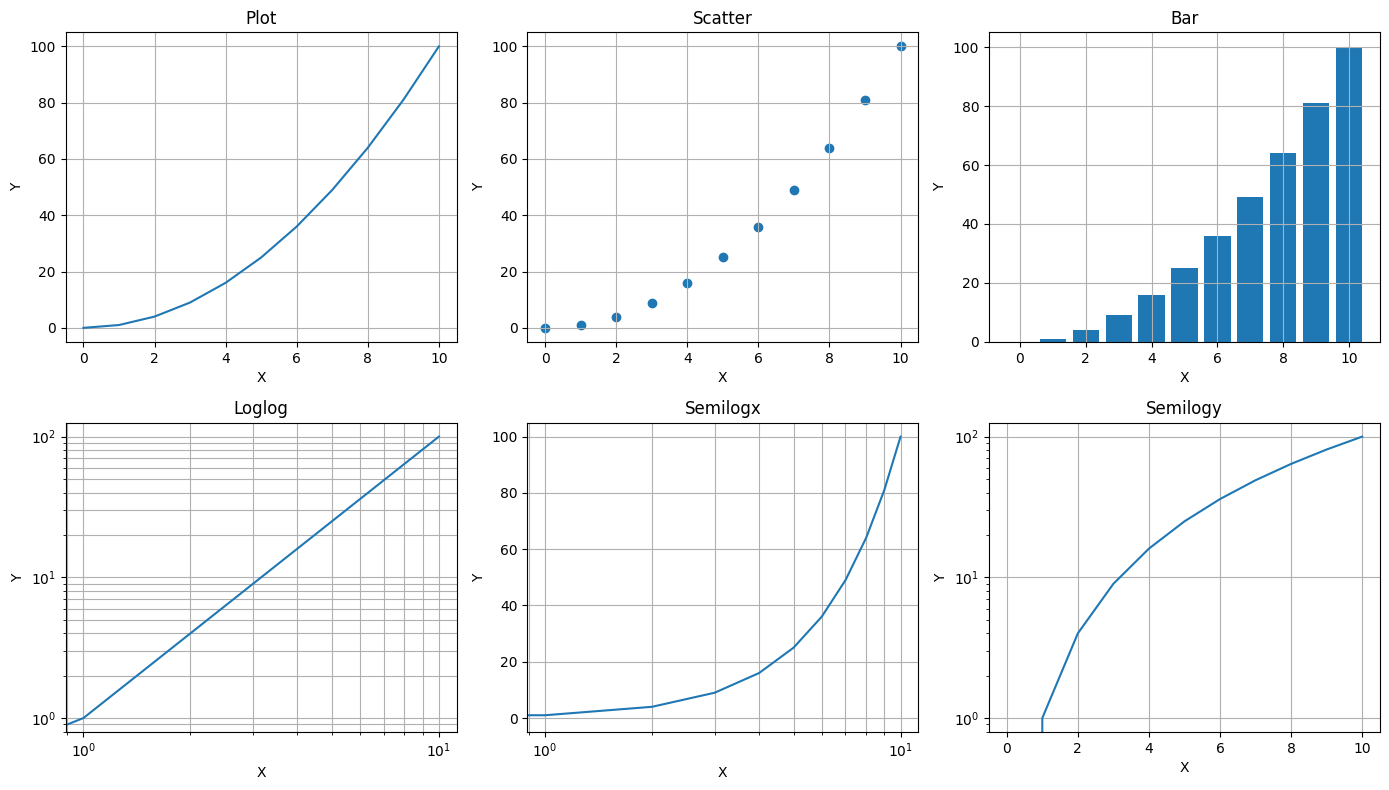

In [39]:
x = np.arange(11)
y = x**2

plt.figure(figsize = (14, 8))

plt.subplot(2, 3, 1)
plt.plot(x,y)
plt.title('Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(x,y)
plt.title('Scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 3)
plt.bar(x,y)
plt.title('Bar')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 4)
plt.loglog(x,y)
plt.title('Loglog')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(which='both')

plt.subplot(2, 3, 5)
plt.semilogx(x,y)
plt.title('Semilogx')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(which='both')

plt.subplot(2, 3, 6)
plt.semilogy(x,y)
plt.title('Semilogy')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.tight_layout()

plt.show()

([<matplotlib.patches.Wedge at 0x7276afdf4ca0>,
 [Text(0.980107155175532, 0.4993895917755252, 'Frogs'),
  Text(-0.339918873399729, 1.0461621095732052, 'Hogs'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Dogs'),
  Text(1.0461621838648125, -0.339918644753721, 'Logs')])

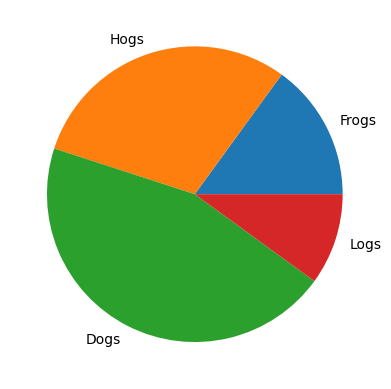

In [40]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

# 3D plotting, heat maps, contour plots

In [45]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [46]:
import_or_install('mpl_toolkits')
from mpl_toolkits import mplot3d
plt.style.use('seaborn-v0_8-poster')

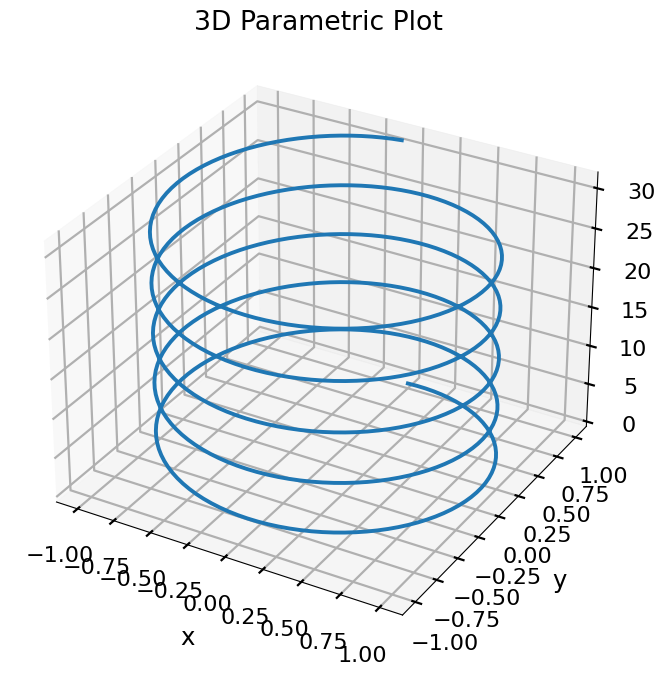

In [47]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

# use
# ax.view_init(120, 30) 
#  to change the initial view angle

plt.show()

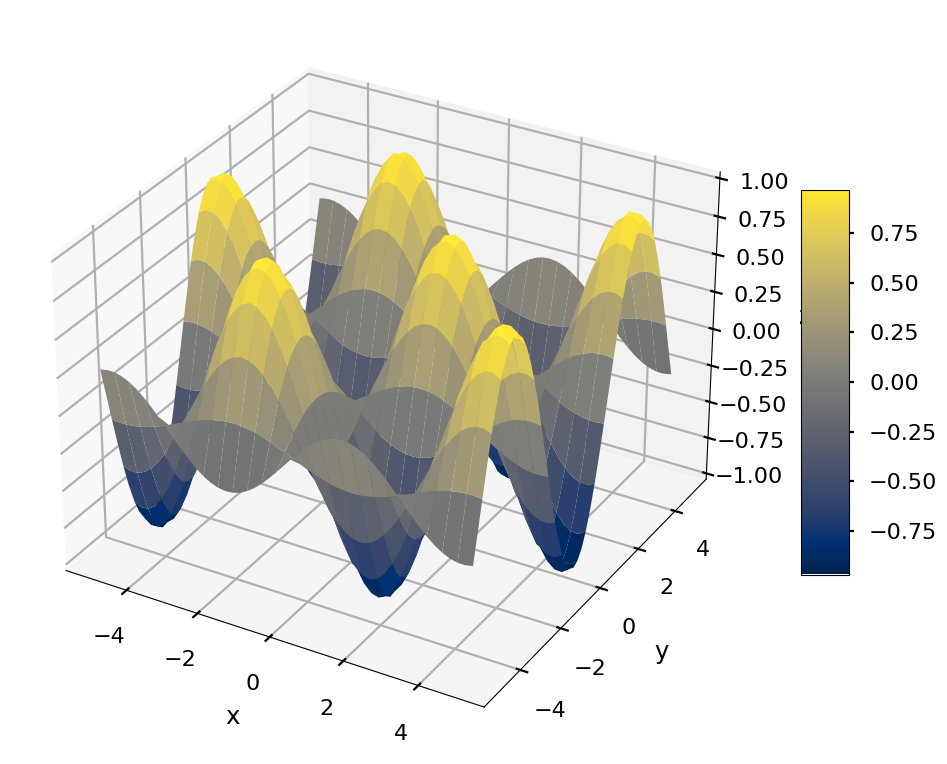

In [48]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

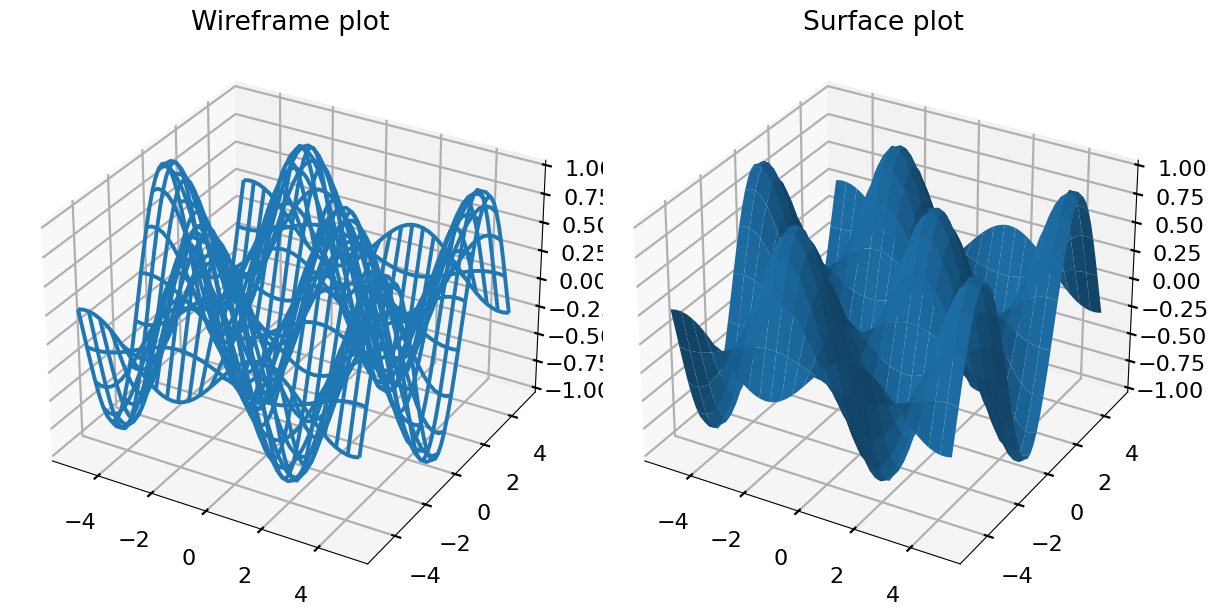

In [49]:
fig = plt.figure(figsize=(12,6))


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Wireframe plot')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.tight_layout()

plt.show()

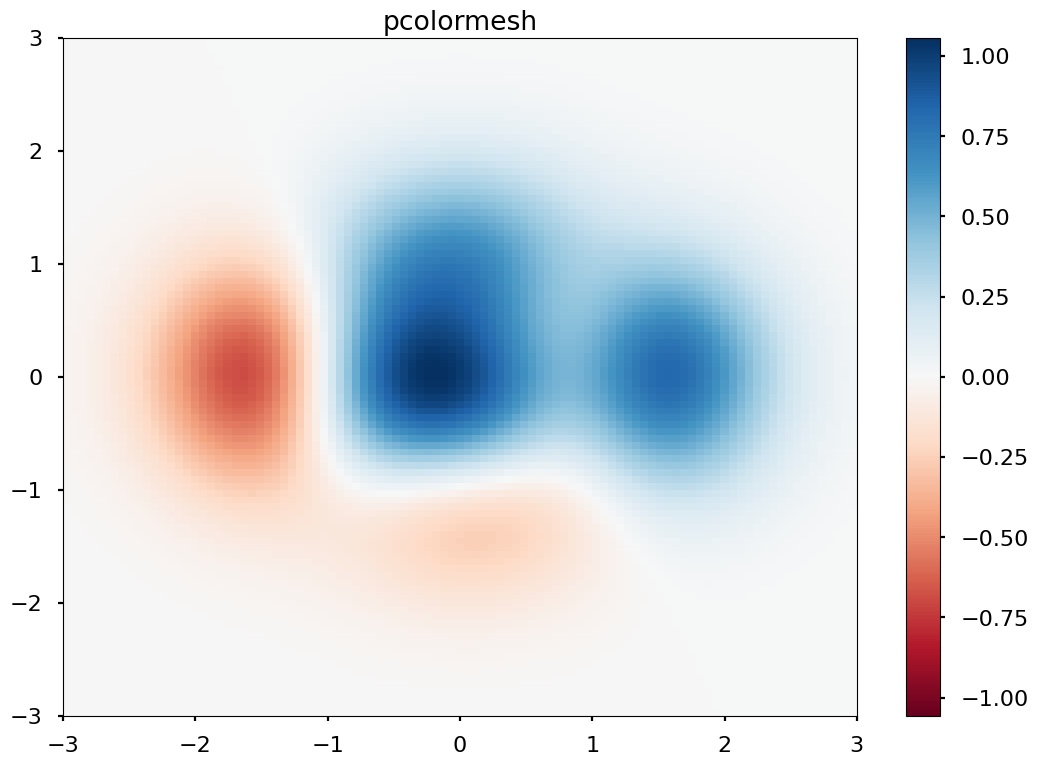

In [50]:
# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [63]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 400)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

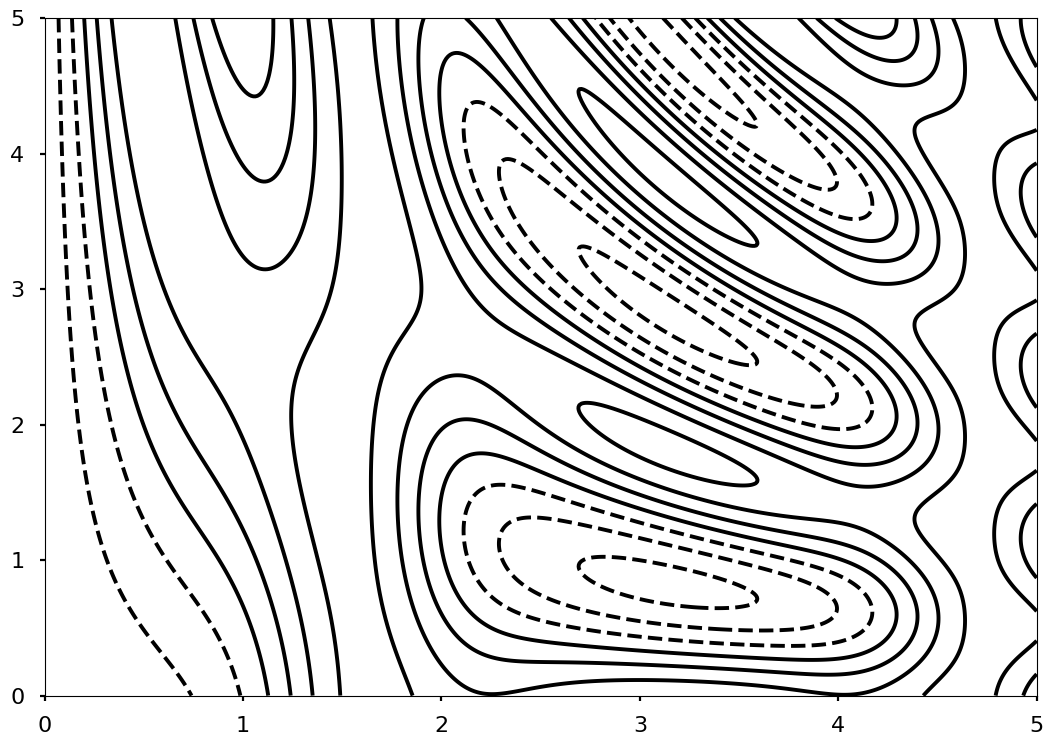

In [64]:
plt.contour(X, Y, Z, colors='black')

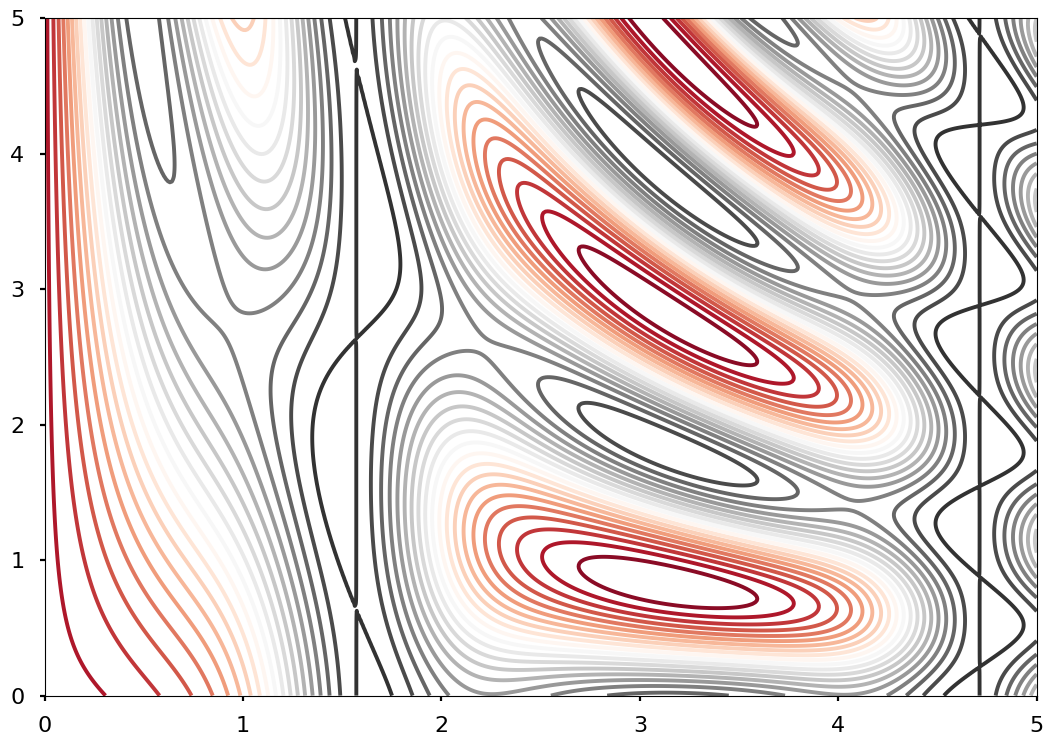

In [65]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

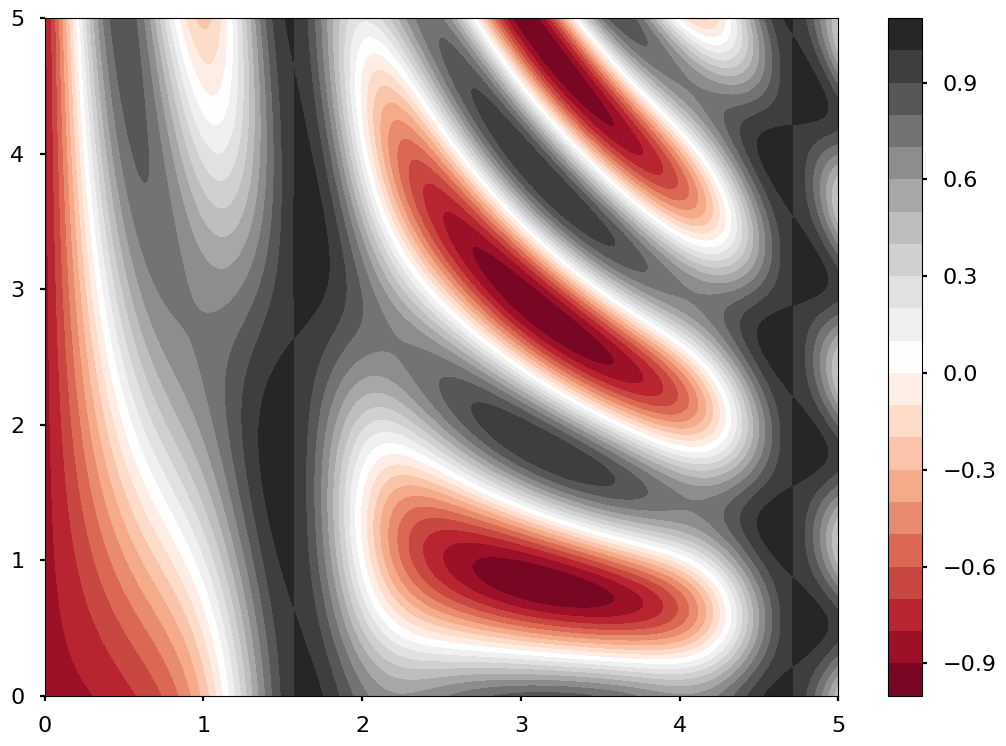

In [66]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

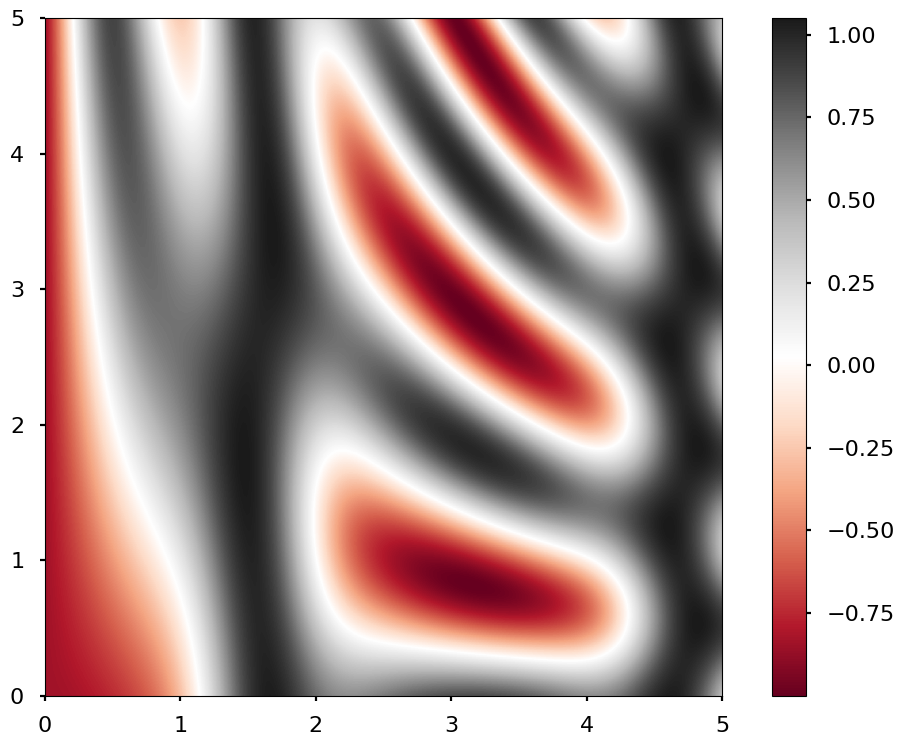

In [67]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.gca().set_aspect('equal')

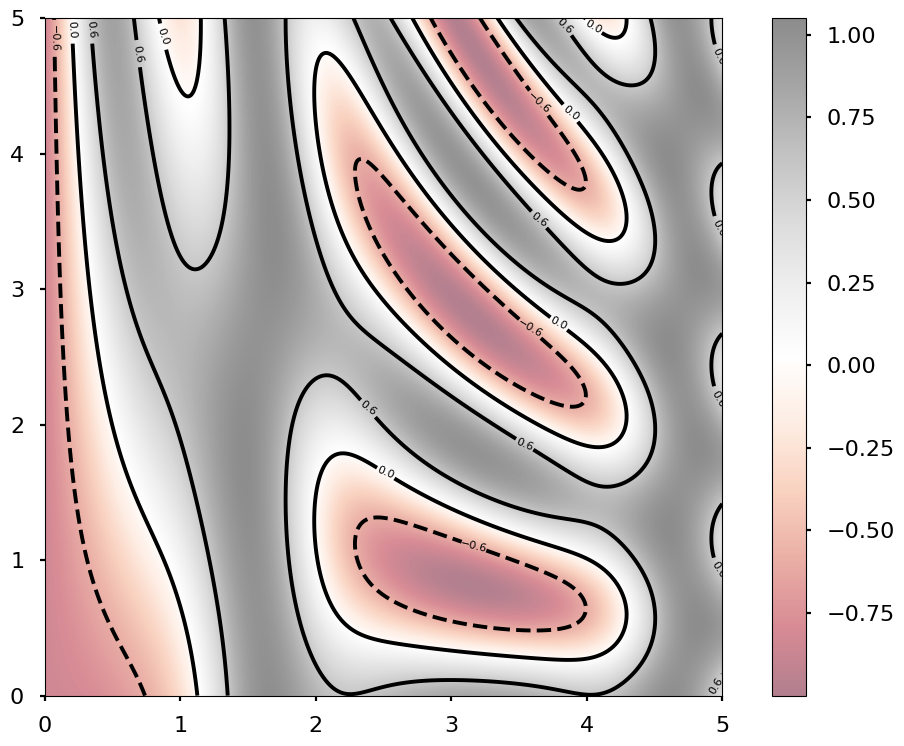

In [68]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

# Task 3

Write a function `my_surface_plotter(f, x, y, option)` where $f$ is a function object $f(x,y)$. The function `my_surface_plotter` should produce a 3D surface plot of $f(x,y)$ using `plot_surface` if option is the string `‘surface’`. It should produce a contour plot of $f(x,y)$ if the option is the string `‘contour’`. Assume that x and y are one-dimensional arrays or lists. Remember to give the plot axis labels and title optionally.

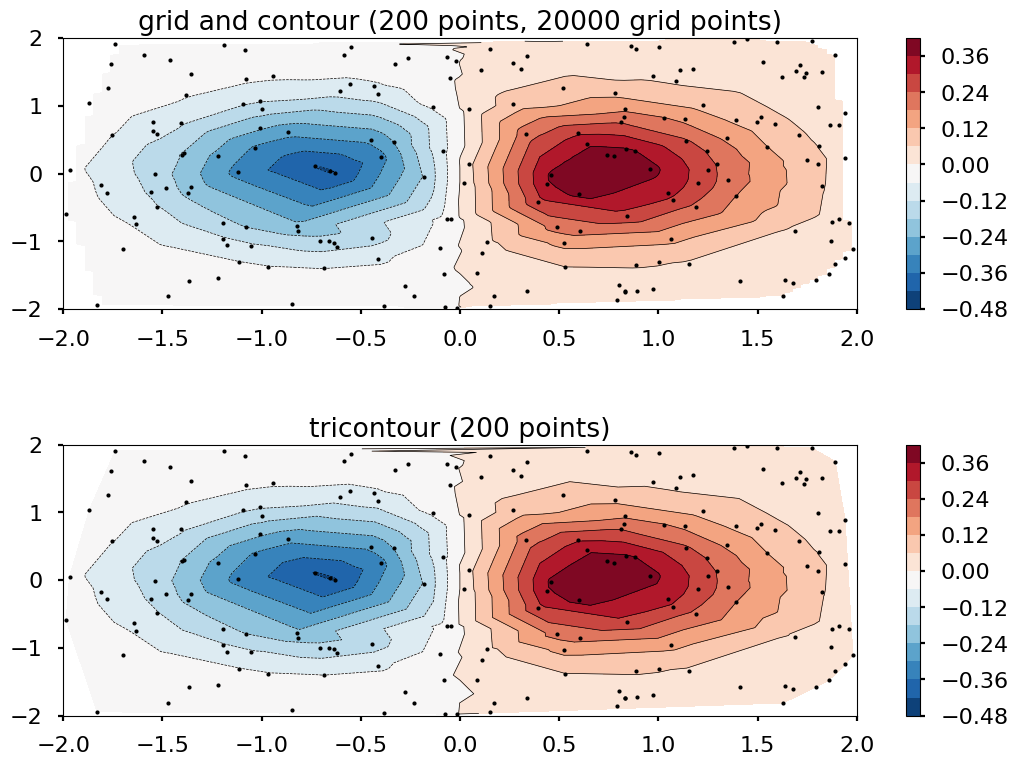

In [52]:
import matplotlib.tri as tri

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

# Homework

Choose a fractal of your liking (eg. Julia, Mandelbrot set, Lorenz Attractor, Bransley fern, Feigenbaum attractor etc.)

**Note** ⚠️: If you are to choose an attractor, look up the map associated to it. These are discrete maps usually (eg. logistic map)

1. Write a code, that generates the fractal. Try to vectorize and use numpy as much as possible. Big iteration numbers may take a lot of time.
2. Visualize the results. Plot the time series of `X` for one parameter, and the parameter phase space. (There will be an extra parameter, let's name `R`, that has to be changed. Plot `X` against `R` to obtain the actual attractor). Note that the time series might not be generated or represented easily for each fractal like structure. If you cant, then don't plot the timeseries, but try to come up with some visualization for that as well.
3. Plot the fractal. Style the axes, give colorbar, if you can, change the colors, such the figure is appealing (don't leave default color settings as it will result in less points).
4. Create an inset figure, that will zoom in to a specific location of the fractal, showcasing, that if you zoom in, indeed a similar pattern can be seen!